# Tennis Ace

A Codecademy ‘challenging’ project from the Data Science course Machine Learning section, supervised machine learning (linear regression model).

## Overview

This project is slightly different than others you can encountered on Codecademy.<br> 
Instead of a step-by-step tutorial, this project contains a series of open-ended requirements which describe the project. 

- Project Goals:<br>
Create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the <a href="https://www.atptour.com/">Association of Tennis Professionals (ATP)</a> data, you will determine what it takes to be one of the best tennis players in the world.
- Prerequisites:<br>
In order to complete this project, you should have completed the Linear Regression and Multiple Linear Regression lessons in the <a href="https://www.codecademy.com/learn/machine-learning">Machine Learning Course</a>.
- Using Jupyter Notebook as the project code presentation is a personal preference, not a project requirement.

### Project Requirements

No three words are sweeter to hear as a tennis player than those, which indicate that a player has beaten their opponent. While you can head down to your nearest court and aim to overcome your challenger across the net without much practice, a league of professionals spends day and night, month after month practicing to be among the best in the world.<br>
<br>
Using supervised machine learning models, test the data to better understand what it takes to be an all-star tennis player.

**Libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## <font color=MediumBlue>Investigate the data

Provided in ```tennis_stats.csv``` is the data from the men’s professional tennis league, the <a href="https://www.atptour.com/">ATP (Association of Tennis Professionals)</a>.<br>
Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017.<br>
The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes.<br>

**Source DataFrame:**

In [2]:
man_tennis = pd.read_csv('data/tennis_stats.csv')
man_tennis.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


**DataFrame Information:**

In [3]:
man_tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

### <font color=DarkMagenta> Identifying Data:

- ```Player```: name of the tennis player
- ```Year```: year data was recorded

##### Service Game Columns (Offensive)

- ```Aces```: number of serves by the player where the receiver does not touch the ball
- ```DoubleFaults```: number of times player missed both first and second serve attempts
- ```FirstServe```: % of first-serve attempts made
- ```FirstServePointsWon```: % of first-serve attempt points won by the player
- ```SecondServePointsWon```: % of second-serve attempt points won by the player
- ```BreakPointsFaced```: number of times where the receiver could have won service game of the player
- ```BreakPointsSaved```: % of the time the player was able to stop the receiver from winning service game when they had the chance
- ```ServiceGamesPlayed```: total number of games where the player served
- ```ServiceGamesWon```: total number of games where the player served and won
- ```TotalServicePointsWon```: % of points in games where the player served that they won

#####  Return Game Columns (Defensive)

- ```FirstServeReturnPointsWon```: % of opponents first-serve points the player was able to win
- ```SecondServeReturnPointsWon```: % of opponents second-serve points the player was able to win
- ```BreakPointsOpportunities```: number of times where the player could have won the service game of the opponent
- ```BreakPointsConverted```: % of the time the player was able to win their opponent’s service game when they had the chance
- ```ReturnGamesPlayed```: total number of games where the player’s opponent served
- ```ReturnGamesWon```: total number of games where the player’s opponent served and the player won
- ```ReturnPointsWon```: total number of points where the player’s opponent served and the player won
- ```TotalPointsWon```: % of points won by the player

##### Outcomes

- ```Wins```: number of matches won in a year
- ```Losses```: number of matches lost in a year
- ```Winnings```: total winnings in USD in a year
- ```Ranking```: ranking at the end of year

**DataFrame Statistical Summary:**

In [4]:
man_tennis.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


**Coefficient of Correlation Matrix DataFrame:**

In [5]:
man_tennis_corr = man_tennis.corr()

man_tennis_corr.to_csv('data/man_tennis_corr.csv')
man_tennis_corr

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
Year,1.000000,0.051406,-0.016728,-0.106784,0.005300,-0.039087,-0.108367,-0.072404,-0.101735,-0.114806,...,-0.073256,-0.078229,-0.108477,-0.008930,-0.041790,-0.005544,-0.108235,-0.077181,0.043908,-0.040483
FirstServe,0.051406,1.000000,-0.070659,0.025488,0.101417,-0.001924,0.048149,-0.018877,0.057709,0.062345,...,-0.010676,0.004189,0.071920,0.137473,0.148349,0.180996,0.064832,0.053736,0.057882,-0.068759
FirstServePointsWon,-0.016728,-0.070659,1.000000,0.021729,0.320765,-0.004724,0.460323,-0.041538,0.301925,0.324853,...,-0.010193,-0.002793,0.376460,0.817829,0.648753,0.860033,0.356702,0.330581,0.361121,-0.150004
FirstServeReturnPointsWon,-0.106784,0.025488,0.021729,1.000000,0.072707,0.301265,0.140165,0.324057,0.295724,0.313338,...,0.757435,0.834267,0.261206,0.091319,0.496682,0.052335,0.256029,0.243278,0.240808,-0.178664
SecondServePointsWon,0.005300,0.101417,0.320765,0.072707,1.000000,0.103584,0.266269,0.052755,0.258691,0.277782,...,0.096622,0.095585,0.296809,0.650764,0.622673,0.713076,0.268979,0.250918,0.281215,-0.181013
SecondServeReturnPointsWon,-0.039087,-0.001924,-0.004724,0.301265,0.103584,1.000000,0.095494,0.264413,0.234212,0.249583,...,0.603755,0.727338,0.209521,0.096553,0.408975,0.055004,0.193093,0.185217,0.199401,-0.159592
Aces,-0.108367,0.048149,0.460323,0.140165,0.266269,0.095494,1.000000,0.037188,0.757405,0.784934,...,0.139987,0.138023,0.866138,0.440922,0.428679,0.472101,0.825301,0.768628,0.798404,-0.277811
BreakPointsConverted,-0.072404,-0.018877,-0.041538,0.324057,0.052755,0.264413,0.037188,1.000000,0.096368,0.086502,...,0.561759,0.387170,0.083182,-0.025670,0.255050,-0.007254,0.076989,0.062297,0.075022,-0.051005
BreakPointsFaced,-0.101735,0.057709,0.301925,0.295724,0.258691,0.234212,0.757405,0.096368,1.000000,0.973352,...,0.335205,0.331043,0.971296,0.354012,0.463110,0.354005,0.883470,0.943309,0.876036,-0.322082
BreakPointsOpportunities,-0.114806,0.062345,0.324853,0.313338,0.277782,0.249583,0.784934,0.086502,0.973352,1.000000,...,0.358483,0.352783,0.978278,0.372271,0.491198,0.380716,0.923453,0.909295,0.900444,-0.334548


## <font color=MediumBlue>Data Analysis 

The project's objective is to determine what it takes to be one of the best tennis players in the world.<br>
With that objective in mind, when using the DataFrame ```man_tennis```, we are interested to see if strong relationships exist between some of the (Offensive) service columns values and the outcome columns values , and between some of the (Defensive) service columns values and the outcome columns values.  

### <font color=DarkMagenta> Correlation Analysis

The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables, in our example is the pairing of the DataFrame columns to measure the strength of the relationship between two columns values. (See Coefficient of Correlation Matrix DataFrame, ```man_tennis_corr```).<br>
The calculated correlation values range between -1.0 and 1.0.<br>
A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation.<br> 
A correlation of 0.0 shows no linear relationship between the movement of the two variables.<br>

Using the Pandas function ```DataFrame.corr()```, I saved the DataFrame ```man_tennis``` columns coefficient of correlation values in the DataFrame ```man_tennis_corr``` (See Coefficient of Correlation Matrix DataFrame), from it, we want to isolated the correlation coefficient values relative to the columns ```Wins```, ```Winnings``` and ```Ranking``` to  see if strong relationships exists between the (Offensive) service columns values and the outcome columns Winnings and Ranking values , and between the (Defensive) return columns values and the outcome columns Winnings and Ranking values.

Note: The pairing of the column ```Losses``` with the service and return columns is not useful to determine what it takes to be one of the best tennis players in the world.

In [6]:
man_tennis_corr_outcome = man_tennis_corr[['Winnings', 'Wins', 'Ranking']].reset_index()
man_tennis_corr_outcome.rename(columns={'index':'Feature'}, inplace=True)

man_tennis_corr_outcome

,Feature,Winnings,Wins,Ranking
0,Year,0.043908,-0.108235,-0.040483
1,FirstServe,0.057882,0.064832,-0.068759
2,FirstServePointsWon,0.361121,0.356702,-0.150004
3,FirstServeReturnPointsWon,0.240808,0.256029,-0.178664
4,SecondServePointsWon,0.281215,0.268979,-0.181013
5,SecondServeReturnPointsWon,0.199401,0.193093,-0.159592
6,Aces,0.798404,0.825301,-0.277811
7,BreakPointsConverted,0.075022,0.076989,-0.051005
8,BreakPointsFaced,0.876036,0.883470,-0.322082
9,BreakPointsOpportunities,0.900444,0.923453,-0.334548


Note:The correlation coefficient values relative to the ```Year ``` column values and to the outcome columns values to themselves or to each other is not really useful  to our analysis.

Droping the ```Year ``` , ```Winnings```, ```Wins```, ```Losses``` and ```Ranking``` features.

In [7]:
man_tennis_corr_outcome = man_tennis_corr_outcome[(man_tennis_corr_outcome.Feature != 'Year') 
                                                      & (man_tennis_corr_outcome.Feature != 'Wins') 
                                                      & (man_tennis_corr_outcome.Feature != 'Losses') 
                                                      & (man_tennis_corr_outcome.Feature != 'Winnings') 
                                                      & (man_tennis_corr_outcome.Feature != 'Ranking')]

man_tennis_corr_outcome.to_csv('data/man_tennis_corr_outcome.csv')
man_tennis_corr_outcome

,Feature,Winnings,Wins,Ranking
1,FirstServe,0.057882,0.064832,-0.068759
2,FirstServePointsWon,0.361121,0.356702,-0.150004
3,FirstServeReturnPointsWon,0.240808,0.256029,-0.178664
4,SecondServePointsWon,0.281215,0.268979,-0.181013
5,SecondServeReturnPointsWon,0.199401,0.193093,-0.159592
6,Aces,0.798404,0.825301,-0.277811
7,BreakPointsConverted,0.075022,0.076989,-0.051005
8,BreakPointsFaced,0.876036,0.883470,-0.322082
9,BreakPointsOpportunities,0.900444,0.923453,-0.334548
10,BreakPointsSaved,0.258271,0.252053,-0.121220


To refine our data analysis with the goal to determine what it takes to be one of the best tennis players in the world:<br>

- I created a correlation DataFrame relative to the players serving, playing offence, using:
    - The outcome columns:
        - ```Wins```: number of matches won in a year
        - ```Winnings```: total winnings in USD in a year
        - ```Ranking```: ranking at the end of year
    - And pairing them with the columns:
        - ```Aces```: number of serves by the player where the receiver does not touch the ball
        - ```DoubleFaults```: number of times player missed both first and second serve attempts
        - ```FirstServePointsWon```: % of first-serve attempt points won by the player
        - ```SecondServePointsWon```: % of second-serve attempt points won by the player
        - ```BreakPointsFaced```: number of times where the receiver could have won service game of the player
        - ```BreakPointsSaved```: % of the time the player was able to stop the receiver from winning service game when they had the chance
        - ```ServiceGamesWon```: total number of games where the player served and won
        - ```TotalServicePointsWon```: % of points in games where the player served that they won
<br>
<br>
- I created a correlation DataFrame relative to the players receiving, playing defense, using:
    - The outcome columns:
        - ```Wins```: number of matches won in a year
        - ```Winnings```: total winnings in USD in a year
        - ```Ranking```: ranking at the end of year
    - And pairing them with the columns:
        - ```FirstServeReturnPointsWon```: % of opponents first-serve points the player was able to win
        - ```SecondServeReturnPointsWon```: % of opponents second-serve points the player was able to win
        - ```BreakPointsOpportunities```: number of times where the player could have won the service game of the opponent
        - ```BreakPointsConverted```: % of the time the player was able to win their opponent’s service game when they had the chance
        - ```ReturnGamesPlayed```: total number of games where the player’s opponent served
        - ```ReturnGamesWon```: total number of games where the player’s opponent served and the player won
        - ```ReturnPointsWon```: total number of points where the player’s opponent served and the player won
        - ```TotalPointsWon```: % of points won by the player

#### <font color=MediumBlue>Offense Correlation DataFrame:

In [8]:
man_tennis_corr_outcome_off = man_tennis_corr_outcome.loc[(man_tennis_corr_outcome.Feature == 'Aces')
                                                      | (man_tennis_corr_outcome.Feature == 'DoubleFaults') 
                                                      | (man_tennis_corr_outcome.Feature == 'FirstServePointsWon') 
                                                      | (man_tennis_corr_outcome.Feature == 'SecondServePointsWon') 
                                                      | (man_tennis_corr_outcome.Feature == 'BreakPointsFaced')
                                                      | (man_tennis_corr_outcome.Feature == 'BreakPointsSaved')    
                                                      | (man_tennis_corr_outcome.Feature == 'ServiceGamesWon')
                                                      | (man_tennis_corr_outcome.Feature == 'TotalServicePointsWon')]\
                                                     .sort_values(by='Wins', ascending=False)\
                                                    .reset_index(drop=True)

man_tennis_corr_outcome_off.to_csv('data/man_tennis_corr_outcome_off.csv')          
man_tennis_corr_outcome_off

,Feature,Winnings,Wins,Ranking
0,BreakPointsFaced,0.876036,0.883470,-0.322082
1,DoubleFaults,0.854685,0.847459,-0.305866
2,Aces,0.798404,0.825301,-0.277811
3,TotalServicePointsWon,0.407707,0.399270,-0.208355
4,ServiceGamesWon,0.395577,0.385040,-0.198822
5,FirstServePointsWon,0.361121,0.356702,-0.150004
6,SecondServePointsWon,0.281215,0.268979,-0.181013
7,BreakPointsSaved,0.258271,0.252053,-0.121220


#### <font color=MediumBlue>Defense Correlation DataFrame:

In [9]:
man_tennis_corr_outcome_def = man_tennis_corr_outcome.loc[(man_tennis_corr_outcome.Feature == 'FirstServeReturnPointsWon') 
                                                      | (man_tennis_corr_outcome.Feature == 'SecondServeReturnPointsWon')
                                                      | (man_tennis_corr_outcome.Feature == 'BreakPointsOpportunities')
                                                      | (man_tennis_corr_outcome.Feature == 'BreakPointsConverted')
                                                      | (man_tennis_corr_outcome.Feature == 'ReturnGamesWon')
                                                      | (man_tennis_corr_outcome.Feature == 'ReturnPointsWon')
                                                      | (man_tennis_corr_outcome.Feature == 'TotalPointsWon')]\
                                                     .sort_values(by='Wins', ascending=False)\
                                                     .reset_index(drop=True)

man_tennis_corr_outcome_def.to_csv('data/man_tennis_corr_outcome_def.csv')
man_tennis_corr_outcome_def

,Feature,Winnings,Wins,Ranking
0,BreakPointsOpportunities,0.900444,0.923453,-0.334548
1,TotalPointsWon,0.461061,0.459368,-0.272007
2,ReturnGamesWon,0.279645,0.292920,-0.191280
3,ReturnPointsWon,0.271646,0.280240,-0.202597
4,FirstServeReturnPointsWon,0.240808,0.256029,-0.178664
5,SecondServeReturnPointsWon,0.199401,0.193093,-0.159592
6,BreakPointsConverted,0.075022,0.076989,-0.051005


#### <font color=MediumBlue>Correlation Results Analysis:

The correlation data shows strong relationships:

- between ```BreakPointsOpportunities``` and ```Winnings```, with a correlation coefficient ```r=0.90```.
- between ```BreakPointsFaced``` and ```Winnings```, with a correlation coefficient ```r=0.88```.
- between ```DoubleFaults``` and ```Winnings```, with a correlation coefficient ```r=0.85```.
- between ```Aces``` and ```Winnings```, with a correlation coefficient ```r=0.80```.
<br><br>
- between ```BreakPointsOpportunities``` and ```Wins```, with a correlation coefficient ```r=0.92```.
- between ```BreakPointsFaced``` and ```Wins```, with a correlation coefficient ```r=0.88```.
- between ```DoubleFaults``` and ```Wins```, with a correlation coefficient ```r=0.85```.
- between ```Aces``` and ```Wins```, with a correlation coefficient ```r=0.82```.


The ```BreakPointsOpportunities```, ```BreakPointsFaced```, ```DoubleFaults``` and ```Aces``` features seem to have strong correlations with ‘what it takes to be one of the best tennis players in the world’.

The outcome ```Ranking``` has negative correlation coefficient values relative to all the features, and the values are too low in magnitude to show a relevant correlation between the features and the ```Ranking``` outcome.

A graphical representation of the relationships between the features and the outcomes can help us visualize if linear correlations exist between some of the features and the outcomes. 


###  <font color=DarkMagenta>Features and Outcomes  Relationships Graphical Visualization  

To graphically visualize the relationship between the features and the outcomes, scatter plots graphs are best fitted for the task.<br>
The scatter plots graph is useful to visually identify relationships between a first and a second entries of paired data.
- If it seems that the points follow a linear pattern well, a high linear correlation may exist between the paired date.  
- If it seems that the data do not follow a linear pattern, a no linear correlation may exist between the paired date.  
- If the data somewhat follow a linear path, a moderate linear correlation may exist between the paired date.

 

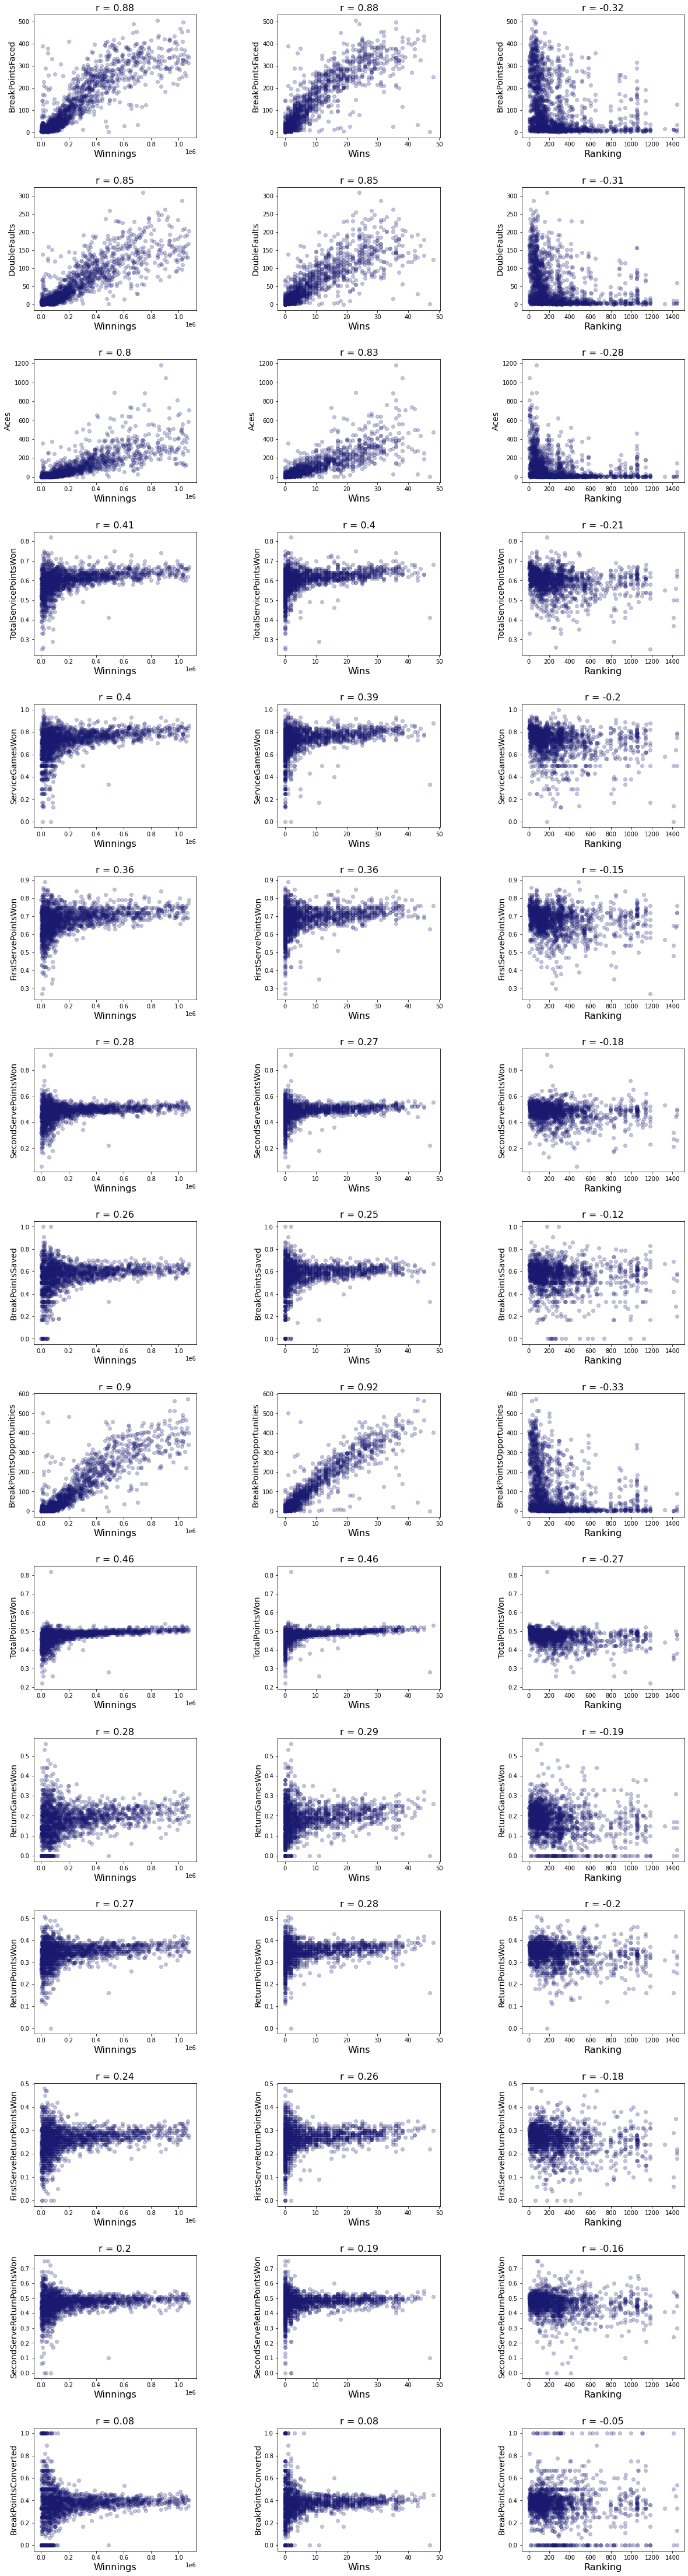

In [94]:
# Outcome name list 
outcomes = ['Winnings', 'Wins', 'Ranking']
# Features offense and defense lists
offense = man_tennis_corr_outcome_off.Feature.values.tolist()
defense = man_tennis_corr_outcome_def.Feature.values.tolist()

# Features list
features = offense + defense

# Visuals relationships matrix scatter plot
plt.figure(figsize=(20, 80))
plt.subplots_adjust(wspace=0.5, hspace=0.4)
# Loops through features and outcomes
for i in range(len(features)):
    for j in range(len(outcomes)):
        plt.subplot(len(features), len(outcomes), 1+i*len(outcomes)+j)
        plt.scatter(man_tennis[outcomes[j]], man_tennis[features[i]], c='midnightblue', alpha=0.25)
        plt.xlabel(outcomes[j], fontsize=16)
        plt.ylabel(features[i], fontsize=14)
        plt.title(f'r = {round(man_tennis[features[i]].corr(man_tennis[outcomes[j]]), 2)}', fontsize=16)

plt.savefig('graph/all_features_vs_outcomes_grid.png')        
plt.show()
plt.close()

The pairing of the outcome ```Ranking``` data with the offence and defense data seem to show that is no linear correlation between the outcome ```Ranking``` and all the features data.

The pairing of the features ```BreakPointsOpportunities```, ```BreakPointsFaced```, ```DoubleFaults``` and ```Aces``` data with the  outcomes ```Winnings``` and ```Wins``` data seem to show a high linear correlation between the four features and the two outcomes.

Using single feature linear regression and multiple features linear regression models on the data, will help predict how those four features affect the outcomes ```Winnings``` and ```Wins```.<br>


## <font color=MediumBlue>Linear Regression 

"In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable." <a href="https://en.wikipedia.org/wiki/Linear_regression#:~:text=In%20statistics%2C%20linear%20regression%20is,is%20called%20simple%20linear%20regression."> Linear regression</a>

### <font color=DarkMagenta>Simple Linear Regression

Simple linear regression, also called single feature linear regression in data science, is used to estimate the relationship between two quantitative variables, one independent variable and one dependent variable.

The features ```BreakPointsOpportunities```, ```BreakPointsFaced```, ```DoubleFaults``` and ```Aces``` showed strong correlation with the outcomes ```Winnings``` and ```Wins```.

```Winnings``` and ```Wins``` have very similar correlation coefficient values and scatter plots diagram results.<br> 
With ```Wins``` been the number of matches won in a year by the player and ```Winnings``` been the amount of US dollars won by the player in a year.<br>
Predicting ```Winnings``` will be slightly more accurate than ```Wins``` to determine ‘what it takes to be one of the best tennis players in the world’.<br>
For example, during a tournament a player that wins the tournament will have a greater amount of winnings than a player that may not have won the tournament but got second place and won more matches during the tournament.

In [11]:
highest_winnings = man_tennis.sort_values(by='Winnings', ascending=False).reset_index(drop=True).head()
highest_winnings = highest_winnings[['Player', 'Year', 'Winnings', 'Wins']]

highest_winnings.to_csv('data/highest_winnings.csv')
highest_winnings

,Player,Year,Winnings,Wins
0,Sam Querrey,2010,1074562,39
1,Feliciano Lopez,2016,1068603,31
2,Gilles Simon,2012,1067734,43
3,Gael Monfils,2011,1061670,38
4,Dominic Thiem,2015,1052937,36


Also, when determining ‘what it takes to be one of the best tennis players in the world’ is important to understand how the features, that we want to use in our linear regression models, are correlated to the outcome ```Winnings``` relative to the player.<br>
<br>
for example:<br>
<br>
```BreakPointsOpportunities``` and ```Aces``` are positive results relative to the player.<br>
- ```BreakPointsOpportunities```: number of times where the player could have won the service game of the opponent
- ```Aces```: number of serves by the player where the receiver does not touch the ball

```BreakPointsFaced``` and ```DoubleFaults``` are negative results relative to the player.<br>
- ```BreakPointsFaced```: number of times where the receiver could have won service game of the player
- ```DoubleFaults```: number of times player missed both first and second serve attempts

I grouped the features into two categories:
- Positive category: 'what the player needs to have in a significant amount, to be one of the best tennis players in the world'
- Negative category: 'what the player can not to have in a significant amount, to be one of the best tennis players in the world'

Positive features:
- ```Aces```: number of serves by the player where the receiver does not touch the ball
- ```BreakPointsOpportunities```: number of times where the player could have won the service game of the opponent
- ```FirstServePointsWon```: % of first-serve attempt points won by the player
- ```SecondServePointsWon```: % of second-serve attempt points won by the player
- ```BreakPointsSaved```: % of the time the player was able to stop the receiver from winning service game when they had the chance
- ```ServiceGamesWon```: total number of games where the player served and won
- ```TotalServicePointsWon```: % of points in games where the player served that they won
- ```FirstServeReturnPointsWon```: % of opponents first-serve points the player was able to win
- ```SecondServeReturnPointsWon```: % of opponents second-serve points the player was able to win
- ```BreakPointsConverted```: % of the time the player was able to win their opponent’s service game when they had the chance
- ```ReturnGamesWon```: total number of games where the player’s opponent served and the player won
- ```ReturnPointsWon```: total number of points where the player’s opponent served and the player won
- ```TotalPointsWon```: % of points won by the player

Negative features:
- ```BreakPointsFaced```: number of times where the receiver could have won service game of the player
- ```DoubleFaults```: number of times player missed both first and second serve attempts

#### <font color=MediumBlue>Using Real Data to predict how the features affect winnings

In our single feature linear regressions, we will use the best top four correlation features to predict winnings, we will use the positive features ```BreakPointsOpportunities``` and ```Aces``` data, and the negative features ```BreakPointsFaced```, ```DoubleFaults``` data as a individual sets of variables and pair each of them with the ```Winnings``` outcome data.

In [12]:
# Features name list
four_best_features = ['BreakPointsOpportunities','Aces' , 'BreakPointsFaced', 'DoubleFaults']
# Winnings DataFrame
winnings = man_tennis[['Winnings']]

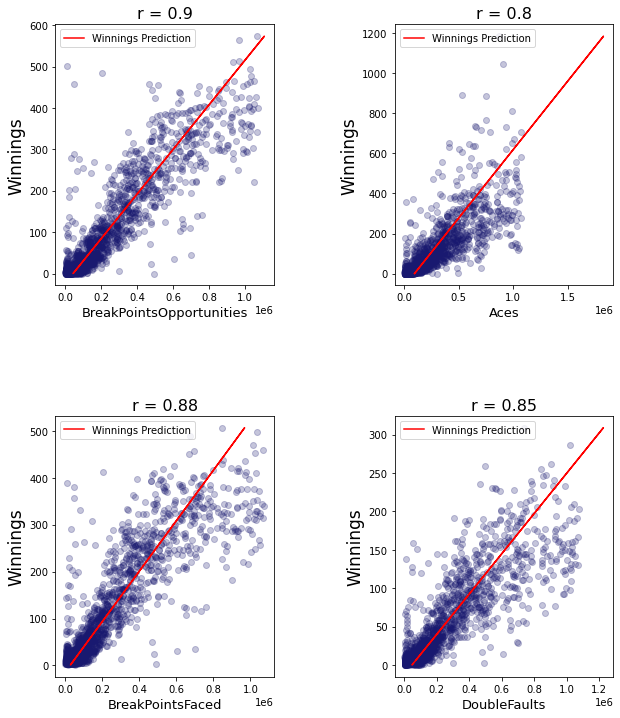

In [13]:
# Visuals relationships matrix scatter plots and winnings predictions (line of best fit)
plt.figure(figsize=(10, 12))
plt.subplots_adjust(wspace=0.55, hspace=0.5)
# Loops through  features
for i in range(len(four_best_features)):
    plt.subplot(2 , 2, 1+i) 
    plt.scatter(winnings, man_tennis[four_best_features[i]],  c='midnightblue', alpha=0.25)
    plt.xlabel(four_best_features[i], fontsize=13)
    plt.ylabel('Winnings', fontsize=17)
    plt.title(f'r = {round(man_tennis[four_best_features[i]].corr(man_tennis.Winnings), 2)}', fontsize=16)
    
    #------ Predicts winnings --------
    
    # Transforms the pd.series into a numpy array with 1 column 1 row to be use by .fit()
    feature = man_tennis[four_best_features[i]].to_numpy().reshape(-1, 1)
    
    # Linear Regression model
    reg_f = LinearRegression()
    # Line best fit
    # Finds the best coefficient 'm' and best y intercept relative to our feature and outcome 
    reg_f.fit(feature, winnings)
    # Predicts winnings relative to feature
    predict_winnings = reg_f.predict(feature)
    
    ax = plt.plot(predict_winnings, man_tennis[four_best_features[i]] , c='r')
    plt.legend(ax, ['Winnings Prediction'])

plt.savefig('graph/best_4_features_reg_grid.png') 
plt.show()
plt.close()

Base on the real data, the predicted winnings amounts increase as the values of the features increase.

###  <font color=DarkMagenta>Data Analyses Results 

When determining , based on the analyses of the real data, what it takes to be one of the best tennis player in the world, we found that:<br>
<br>
The data from ATP is composed of:
- outcome results
- offensive play features
- defensive play features 

The data reveals:
- from the computed correlation coefficient between features and outcomes
- from the  scatter plots showing the relationship between features and outcomes
- from the simple linear regression <br>

<l>That the best four features to understand what it takes to be one of the best tennis players in the world , are </l>```BreakPointsOpportunities``` , ```Aces```,  ```BreakPointsFaced``` and ```DoubleFaults```.<br>
And the ```Winnings``` outcome seem to be the best outcome to understand what it takes to be one of the best tennis players in the world.

We determined that relative to a player been one of the best tennis player in the world, the features ```BreakPointsOpportunities``` and ```Aces``` have a positive influence, but ```BreakPointsFaced``` and ```DoubleFaults``` have a negative influence.

In other words, a player needs to hold significant high values within the features ```BreakPointsOpportunities``` and ```Aces```, and within the Winnings outcome, the player also need to hold significant low values within the features ```BreakPointsFaced``` and ```DoubleFaults``` to be one of the best tennis players in the world.

### <font color=DarkMagenta>Machine Learning 

"The purpose of machine learning is often to create a model that explains some real-world data, so that we can predict what may happen next, with different inputs.
The simplest model that we can fit to data is a line. When we are trying to find a line that fits a set of data best, we are performing Linear Regression.
We often want to find lines to fit data, so that we can predict unknowns." <a href ="https://www.codecademy.com/paths/data-science/tracks/dspath-supervised/modules/dspath-linear-regression/lessons/linear-regression/exercises/introduction">Codecademy: Introduction to Linear Regression</a>
    
In Supervised learning, you train the machine using data which is well "labeled".

"Supervised machine learning algorithms are amazing tools capable of making predictions and classifications. However, it is important to ask yourself how accurate those predictions are. After all, it’s possible that every prediction your classifier makes is actually wrong! Luckily, we can leverage the fact that supervised machine learning algorithms, by definition, have a dataset of pre-labeled datapoints. In order to test the effectiveness of your algorithm, we’ll split this data into:
training set, validation set and test set."<a href="https://www.codecademy.com/articles/training-set-vs-validation-set-vs-test-set"> Codecademy: Training Set vs Validation Set vs Test Set</a>

#### <font color=MediumBlue>Test Sets and Training Sets

For our project we want to test how well our four feature-winnings simple regression models score in predicting winnings.
-	We need to split our data set in training sets and test sets (real data sample).
-	We want to train our models using the training sets to train our models.
-	And score the models, how well models do at predicting winnings using the test sets.
  
The model scores are the models' coefficient of determination, <u style="font-size:11px">$R^2$</u>, for our example, is the coefficient of determinations of the winnings test set relative to each feature test set. 

"In statistics, the coefficient of determination, is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model."<a href="https://en.wikipedia.org/wiki/Coefficient_of_determination"> Coefficient of Determination<a>

#### <font color=MediumBlue> Best four features verses Winnings

In [33]:
# Creates a DataFrame to store models coefficient of determination 
best_4_f_scores = pd.DataFrame({'Feature':four_best_features, 'Score':float('NaN')})
# Creates an empty dictionary to store the features splits and models results
features_results = {}

In [35]:
# Loops trough the four individual features and creates train and test sets, 
# scores (coefficient of determination) the features againts the outcome Winnings 
for f in four_best_features:
    
    # Features values
    feature = man_tennis[[f]]
    
    # Splits the feature data set in train and test data
    feature_train, feature_test, winnings_train, winnings_test = train_test_split(feature, winnings, train_size = 0.8)
    # Saves the splits results into the features results dictionary
    features_results[f'feature_train_{f}'] = feature_train
    features_results[f'feature_test_{f}'] = feature_test
    features_results[f'winnings_train_{f}'] = winnings_train
    features_results[f'winnings_test_{f}'] = winnings_test
                        
   
    # Creates a model base on linear Regression
    model = LinearRegression()
    # Saves model into the features results dictionary
    features_results[f'model_{f}'] = model
    
    # Find the best coefficient 'm' and best y intercept relative to our feature training sets and winnings training sets,
    # in other words, train the models using the training sets 
    model.fit(feature_train, winnings_train)
    
    # Scores the feature model using the feature test sets (real data)
    best_4_f_scores.loc[best_4_f_scores.Feature == f, 'Score'] = model.score(feature_test, winnings_test)
    
best_4_f_scores.sort_values(by='Score', ascending=False).reset_index(drop=True).to_csv('data/best_4_f_scores.csv')
best_4_f_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

,Feature,Score
0,BreakPointsOpportunities,0.856594
1,BreakPointsFaced,0.771958
2,DoubleFaults,0.757302
3,Aces,0.682735


- The ```BreakPointsOpportunities``` feature, the number of times where the player could have won the service game of the opponent, is of the four features, our best option to predict ```Winnings```.
- The ```BreakPointsFaced``` feature, the number of times where the receiver could have won service game of the player, is of the four features, the second best option to predict ```Winnings```.
- The ```DoubleFaults``` feature, the number of times player missed both first and second serve attempts, is of the four features, the third best option to predict ```Winnings```.
- The feature ```Aces```, the number of serves by the player where the receiver does not touch the ball, is of the four features, the least best option to predict ```Winnings```.

#### <font color=MediumBlue>Models predictions vs actual data

Using our four regression models, we want to predict winnings relative to each feature, and compare it to the actual winnings by using a scatter plots graphs and calculating the coefficient of correlation between the predicted winnings and the actual winnings relative to each of the four best features.   

In [16]:
# Creates a DataFrame to store the coefficient of correlation (actual winnings vs predicted winnings) 
# relative to each of the four best features 
one_feature_winnings_vs_predictions_corr = pd.DataFrame({'Feature':four_best_features, 'coeff_r':float('NaN')})

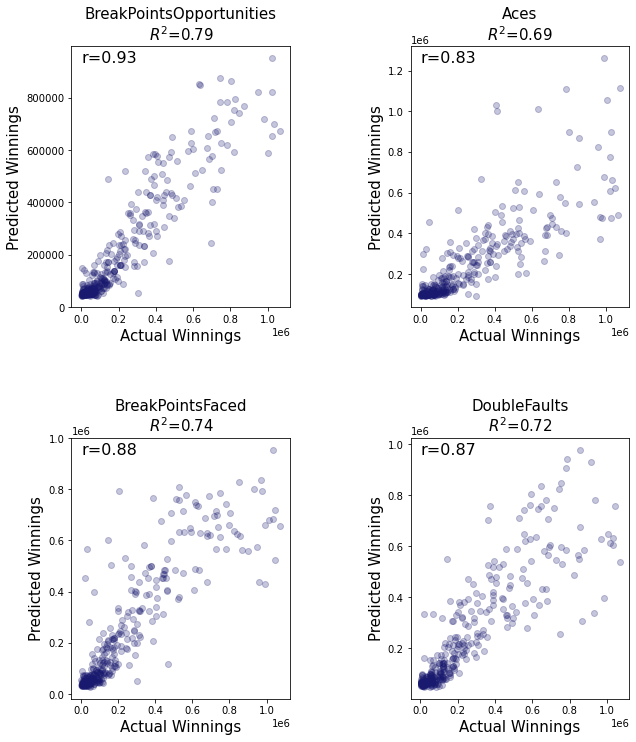

In [43]:
# Creates a figure
plt.figure(figsize=(10, 12))
plt.subplots_adjust(wspace=0.55, hspace=0.5)

# Loops trough the four individual features, creates scatter plots graphs, 
# calculates and saves the coefficient of correlations
for i in range(len(four_best_features)):
    
    # Saves the model, feature test set and winnings test set into variables
    model = features_results[f'model_{four_best_features[i]}']
    
    feature_test = features_results[f'feature_test_{four_best_features[i]}']
    winnings_test = features_results[f'winnings_test_{four_best_features[i]}']
   
    # Makes predictions from the test data using the regression model
    predicted_winnings = model.predict(feature_test)
    
    #------ coefficient of correlation --------
    
    # Creates a DataFrame to store predicted winnings relative to the feature and actual winnings
    winnings_sets = pd.DataFrame()
    winnings_sets['predicted_winnings'] = predicted_winnings.reshape(len(predicted_winnings),)  
    winnings_sets['actual_winnings'] = winnings_test.Winnings.values
    
    # Creates a coefficient of correlation matrix DataFrame 
    winnings_sets_corr = winnings_sets.corr().reset_index()
    
    # Saves the predicted winnings-actual winnings coefficient of correlation relative the feature 
    one_feature_winnings_vs_predictions_corr.loc[one_feature_winnings_vs_predictions_corr.Feature == \
                                                 f'{four_best_features[i]}', 'coeff_r'] = \
                                                            winnings_sets_corr.actual_winnings[0]  
    
    #------ Scatter plot --------
    
    # Visuals model predicted winnings vs actual winnings 
    plt.subplot(2 , 2, i+1) 
    plt.scatter(winnings_test, predicted_winnings,  c='midnightblue', alpha=0.25)
    plt.xlabel('Actual Winnings', fontsize=15)
    plt.ylabel('Predicted Winnings', fontsize=15)
        
    plt.title(f'{four_best_features[i]}\n$R^2$={round(one_feature_scores.Score[i], 2)}', fontsize=15)
    
    # Text-box displaying the the coefficient of correlation relative to each four best feature predicted winnings, r
    plt.text(0, np.max(predicted_winnings), 
             f'r={round(winnings_sets_corr.actual_winnings[0], 2)}', 
             fontsize=16, 
             horizontalalignment='left',
             verticalalignment='center')
    
plt.savefig('graph/four_best_f_grid.png') 
plt.show()
plt.close()

The regression model using the ```BreakPointsOpportunities``` feature, seems to be the best regression model, the coefficient of correlation between the predicted and the actual winnings seems to affirm our deduction.

Note: the score, <u style="font-size:11px">$R^2$</u>, is the coefficient of determination relative to the feature data vs winnings actual data.

In [18]:
one_feature_winnings_vs_predictions_corr.sort_values(by='coeff_r', ascending=False).reset_index(drop=True).\
                                                                                     to_csv('data/r_1f_predicted_winnings.csv')
one_feature_winnings_vs_predictions_corr.sort_values(by='coeff_r', ascending=False).reset_index(drop=True)

,Feature,coeff_r
0,BreakPointsOpportunities,0.891184
1,BreakPointsFaced,0.863917
2,DoubleFaults,0.848775
3,Aces,0.838250


Again, when determining ‘what it takes to be one of the best tennis players in the world’ is important to understand how the features, that we are using in our linear regression models, are correlated to the outcome ```Winnings``` relative to the player.
<br>

As individual features:<br>

- Best
    - ```BreakPointsOpportunities``` is the best feature a player can have in significant amount, 'to be one of the best tennis players in the world'  
    - ```Aces``` is the second best feature a player can have in significant amount, 'to be one of the best tennis players in the world'  

- Worst:
    - ```BreakPointsFaced``` is the worst feature for player to have, in a significant amount, 'to be an all-star tennis player'  
    - ```DoubleFaults``` is the second worst feature a player can have, in a significant amount, 'to be an all-star tennis player' 

A single feature linear regression model is good method to isolate the best features, a multiple linear regression model including two or more of the best features, may also help us to determinate ‘what it takes to be one of the best tennis players in the world’.

### <font color=DarkMagenta>Multiple Features Linear Regression

In machine learning, the multiple linear regression models use two or more independent variables to predict the values of the dependent variable.
Four our project, it is the combinations of one or more features data, independent variables, it is used to predict winnings , the dependent variable.

#### <font color=MediumBlue>Multiple Features Linear Regression Functions

To combine the different features, independent variables, I modified the combinations() function from the <a href="https://docs.python.org/3.1/library/itertools.html?highlight=combinations#itertools.combinations">itertools libray</a> into the function ```f_combinations()``` to better suit the combinations of features.

The ```f_combinations()``` function:
- Takes the arguments:
    - ```features_list```, list data type, single features names list.
    - ```mum```, integer type, the number of features per combination desired.
<br><br>   
- uses the nCr combination type to combine single features names into combinations of ```mum``` features names.<br> 
- saves the combined feature names as list data type ocjects into a combinations list.  
<br>
- returns the combinations list.

In [19]:
def f_combinations(features_list, num):

    n = len(features_list)
    
    if num > n:
        return
    
    indices = list(range(num))
    
    yield list(features_list[i] for i in indices)
    
    while True:
        
        for i in reversed(range(num)):
            if indices[i] != i + n - num:
                break
        else:
            return
        indices[i] += 1
        
        for j in range(i+1, num):
            indices[j] = indices[j-1] + 1
            
        yield list(features_list[i] for i in indices)

The fallowing function computes the ```Winnings``` vs ```multy-features``` coefficients of determination and the ```actual winnings``` vs ```predicted winnings``` coefficients of correlation relative to the multy-features, and saves/returns the coefficients values in a DataFrame.
It also creates/saves a ```actual winnings``` vs ```predicted winnings``` scatter plot grid of ```multy-features``` with relevant coefficients of determination.<br>

The ```multi_features_reg()``` function:
- Takes the arguments:
    - ```features_list```, list data type, single features names list.
    - ```mum```, integer type, the desirer number of features to combine into a multy-feature.
    - ```relevant_score```, float type, set the coefficient of determination value of relevance.
    - ```reg_name```, string type, the desirer Multiple Linear Regression name.
<br>
- computes the ```Winnings``` vs ```multy-features``` coefficients of determination and the ```actual winnings``` vs ```predicted winnings``` coefficients of correlation, and saves the coefficients in a DataFrame  
- creates/saves/shows a ```actual winnings``` vs ```predicted winnings``` scatter plot grid of ```multy-features``` with relevant coefficients of determination.<br> 
<br>
- returns a DataFrame of the coefficients of determination and correlation relative to the ```relevant_score``` value.

In [78]:
def multi_features_reg(features_list, num, relevant_score, reg_name):
        
    # most relevant coefficients of determination counter 
    counter = 0
    
    # Lists
    comb_f_names = []
    scores_list = []
    corr_list = []
    winnings_tests_list = []
    predicted_winnings_list = []
    
    # Combines the feature names into lists of num feature names combinations
    f_list = list(f_combinations(features_list, num))
    
    for comb_f in f_list:
        
        features_values = man_tennis[[f'{comb_f[i]}' for i in range(len(comb_f))]]
        
        # Creates multy-features combined name
        for f in comb_f:
            if f == comb_f[0]:
                 comb_f_name = f
            else:
                comb_f_name = f'{comb_f_name}_{f}'
        comb_f_names.append(comb_f_name)
        
        # Splits the features data and winnings data into trainings and test sets
        features_train, features_test, winnings_train, winnings_test = train_test_split(features_values, 
                                                                                        winnings, 
                                                                                        train_size = 0.80)
        winnings_tests_list.append(winnings_test)
        
        # Creates a model base on linear Regression
        model = LinearRegression()
        # Trains the models using the training sets 
        model.fit(features_train, winnings_train)
        # Makes predictions from the test data using the regression model
        predicted_winnings = model.predict(features_test)
        predicted_winnings_list.append(predicted_winnings)

        #------ the coefficient of determination --------

        score = model.score(features_test, winnings_test)
        scores_list.append(score)

        #------ coefficient of correlation --------

        # Creates a DataFrame to store predicted winnings relative to the two features and actual winnings
        winnings_sets = pd.DataFrame()

        winnings_sets['predicted_winnings'] = predicted_winnings.reshape(len(predicted_winnings),) 
        winnings_sets['actual_winnings'] = winnings_test.Winnings.values

        # Creates a coefficient of correlation matrix DataFrame 
        winnings_sets_corr = winnings_sets.corr().reset_index()

        # Saves the predicted winnings-actual winnings coefficient of correlation relative to the combined features
        corr_list.append(winnings_sets_corr.actual_winnings[0])

        # relevant coefficient of determination
        if score >= relevant_score:
            counter+=1

            
    # Creates a DataFrame with the combined features coefficients of determination and correlation 
    df_coeff = pd.DataFrame({'Features':comb_f_names, 
                                        'Score':scores_list, 
                                        'coeff_r':corr_list})
    
    if counter == 0:
        print('All the combination of ' + str(num) + 
              ' features linear regression models have score results under the relevant score of ' 
              + str(relevant_score))
        return 
    
    
    # ------ scatter plot grid

    # Plot index counter used when displaying scatter plot matrix
    k=1
    # Rows counter, number of rows needed for a 3 columns plotting grid
    if counter%3 == 0:
        rows = counter/3
    else:
        rows = (counter+3-(counter%3))/3
    # Figure height varaible relative to num
    if num >= 3:
        h = 2
    else:
        h = 4
        
    grid = plt.figure(figsize=(20, (h+num)*rows))
    plt.subplots_adjust(wspace=0.5, hspace=(0.22+num/1000)*num)
    
    for i in range(len(f_list)):
        
        if scores_list[i] >= relevant_score:
            
            
            comb_f_names = '\n'.join(names for names in f_list[i])
                        
            # Visuals model predicted winnings vs actual winnings
            plt.subplot(int(rows), 3, k)
            plt.scatter(winnings_tests_list[i], predicted_winnings_list[i],  c='midnightblue', alpha=0.25)
            
            plt.xlabel('Actual Winnings', fontsize=12) 
            plt.ylabel('Precdited Winnings', fontsize=13)
            
            plt.title(f'{comb_f_names}\n$R^2$={round(float(scores_list[i]), 2)}', fontsize=12)
            
            # Text-box displaying the coefficient of correlation, r
            plt.text(0, np.max(predicted_winnings_list[i]), 
                               f'r={round(float(corr_list[i]), 2)}', 
                               fontsize=12, 
                               horizontalalignment='left',
                               verticalalignment='top')
            k+=1
            
    # Saves grid using the desirer Multiple Linear Regression name 
    plt.savefig(f'graph/{reg_name}_grid.png')
    plt.show()
    plt.close()
    
    # Saves the coefficients of determination and correlation relative to the relevant_score value
    # using the desirer Multiple Linear Regression name 
    df = df_coeff.sort_values(by='Score', ascending=False).reset_index(drop=True).head(counter)
    df.to_csv(f'data/{reg_name}_coeff.csv')
    
    return df

#### <font color=MediumBlue>Multy-features Linear Regression Positive and Negative Features

We want to predict winnings using multy-features combinations.

For our dependent variables we will use: 
- The ```Winnings``` outcome: number of matches won in a year.

For our independent variables we will use:<br>

- Positive two features combinations using:
    - ```Aces```: number of serves by the player where the receiver does not touch the ball
    - ```BreakPointsOpportunities```: number of times where the player could have won the service game of the opponent
    - ```FirstServePointsWon```: % of first-serve attempt points won by the player
    - ```SecondServePointsWon```: % of second-serve attempt points won by the player
    - ```BreakPointsSaved```: % of the time the player was able to stop the receiver from winning service game when they had the chance
    - ```ServiceGamesWon```: total number of games where the player served and won
    - ```TotalServicePointsWon```: % of points in games where the player served that they won
    - ```FirstServeReturnPointsWon```: % of opponents first-serve points the player was able to win
    - ```SecondServeReturnPointsWon```: % of opponents second-serve points the player was able to win
    - ```BreakPointsConverted```: % of the time the player was able to win their opponent’s service game when they had the chance
    - ```ReturnGamesWon```: total number of games where the player’s opponent served and the player won
    - ```ReturnPointsWon```: total number of points where the player’s opponent served and the player won
    - ```TotalPointsWon```: % of points won by the player
<br><br>
- Negative two features combinations using:
    - ```BreakPointsFaced```: number of times where the receiver could have won service game of the player
    - ```DoubleFaults```: number of times player missed both first and second serve attempts

##### <font color=MediumBlue>Positive Features, Two Features Linear regression

In [21]:
# Creates a combine two features name list
positive_features_names = ['FirstServePointsWon','FirstServeReturnPointsWon','SecondServePointsWon',
                            'SecondServeReturnPointsWon','Aces','BreakPointsConverted',
                            'BreakPointsOpportunities','BreakPointsSaved','ReturnGamesWon',
                            'ReturnPointsWon','ServiceGamesWon','TotalPointsWon','TotalServicePointsWon']

Linear regression models computing and plotting predicted winnings vs actual winnings of the most relevant positive two features combinations.<br>
```relevant_score``` set to 0.70

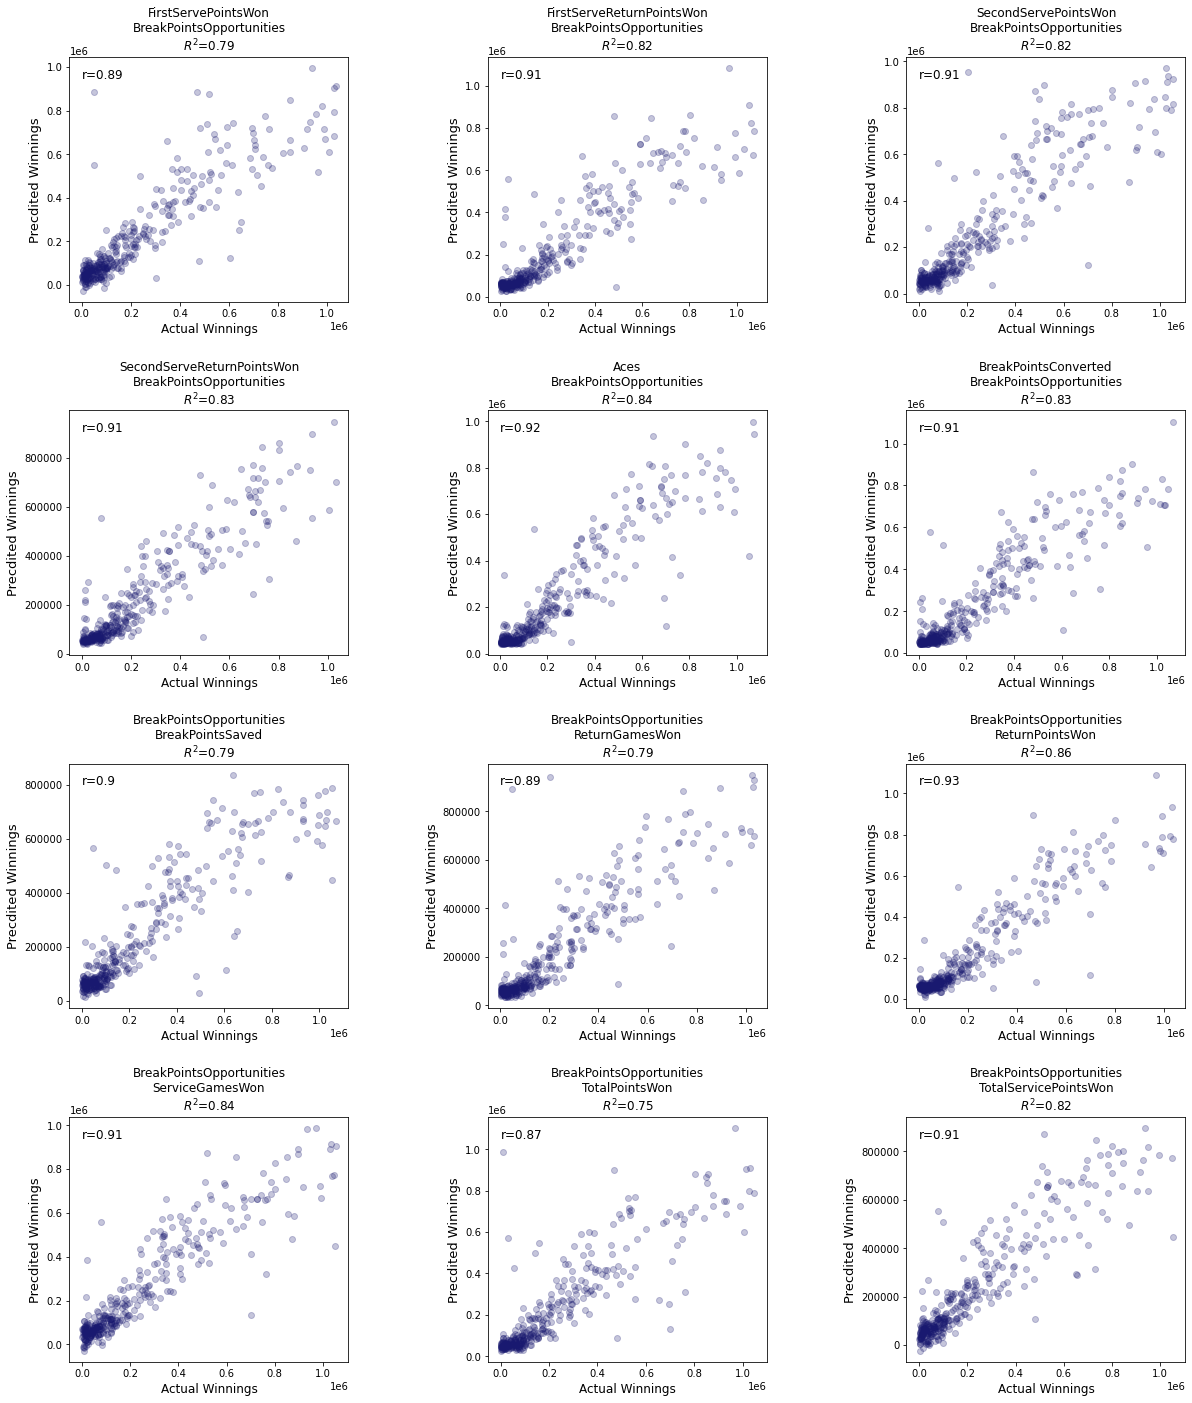

,Features,Score,coeff_r
0,BreakPointsOpportunities_ReturnPointsWon,0.855961,0.925422
1,Aces_BreakPointsOpportunities,0.842074,0.918006
2,BreakPointsOpportunities_ServiceGamesWon,0.835731,0.914339
3,SecondServeReturnPointsWon_BreakPointsOpportun...,0.830022,0.913723
4,BreakPointsConverted_BreakPointsOpportunities,0.825191,0.908463
5,FirstServeReturnPointsWon_BreakPointsOpportuni...,0.821650,0.908040
6,BreakPointsOpportunities_TotalServicePointsWon,0.820143,0.905714
7,SecondServePointsWon_BreakPointsOpportunities,0.817587,0.906268
8,FirstServePointsWon_BreakPointsOpportunities,0.794724,0.891832
9,BreakPointsOpportunities_BreakPointsSaved,0.791899,0.896893


In [84]:
# sets relevant coefficient of determination value
relevant_score = 0.70
#------- Two features linear regression models
p_df_2 = multi_features_reg(positive_features_names , 2, relevant_score, 'positive_two_f')

p_df_2

From the model results, we can say, with moderate certainty, that the above two features combinations are the best two features combinations a player need to have in significant amount, 'to be one of the best tennis players in the world'.<br>
<br>
Note:<br>
Depending at what value, the ```relevant_score``` was set to, the computation of all the positive two features linear regression model may result with all the models having scores under the ```relevant_score```, and the models plot grid not displayed.

##### <font color=MediumBlue>Negative Features, Two Features Linear regression

In [62]:
# Creates a combine two features name list
negative_features_names = ['BreakPointsFaced', 'DoubleFaults']

Linear regression models computing and plotting predicted winnings vs actual winnings of the most relevant negative two features combinations.<br>
```relevant_score``` set to 0.70.

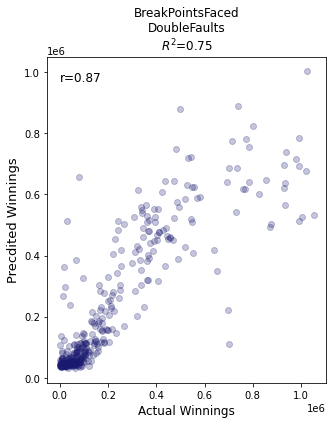

,Features,Score,coeff_r
0,BreakPointsFaced_DoubleFaults,0.747527,0.866416


In [80]:
# sets relevant coefficient of determination value
relevant_score = 0.70
#------- Two features linear regression models
n_df_2 = multi_features_reg(negative_features_names, 2, relevant_score, 'negative_two_f')

n_df_2

From the model results, we can say, with moderate certainty, that the above two features combination is the worst two features combination for a player to have in significant amount, 'to be one of the best tennis players in the world'.<br>
<br>
Note:<br>
Depending at what value the ```relevant_score``` was set to, the computation of the negative two features linear regression model may results with the model having a score under the ```relevant_score```,  and the model plot not displayed.   

From the above results, we can say, with moderate certainty, that the supervised machine learning models using two features, with a coefficient of determination values equal or superior to 0.70, are accurate at predicting winnings.

##### <font color=MediumBlue>Three Features Linear regression

We want to predict winnings using three features combination.

For our dependent variables we will use: 
- The ```Winnings``` outcome: number of matches won in a year.

For our independent variables we will use:<br>

- Positive three features combinations using:
    - ```Aces```: number of serves by the player where the receiver does not touch the ball
    - ```BreakPointsOpportunities```: number of times where the player could have won the service game of the opponent
    - ```FirstServePointsWon```: % of first-serve attempt points won by the player
    - ```SecondServePointsWon```: % of second-serve attempt points won by the player
    - ```BreakPointsSaved```: % of the time the player was able to stop the receiver from winning service game when they had the chance
    - ```ServiceGamesWon```: total number of games where the player served and won
    - ```TotalServicePointsWon```: % of points in games where the player served that they won
    - ```FirstServeReturnPointsWon```: % of opponents first-serve points the player was able to win
    - ```SecondServeReturnPointsWon```: % of opponents second-serve points the player was able to win
    - ```BreakPointsConverted```: % of the time the player was able to win their opponent’s service game when they had the chance
    - ```ReturnGamesWon```: total number of games where the player’s opponent served and the player won
    - ```ReturnPointsWon```: total number of points where the player’s opponent served and the player won
    - ```TotalPointsWon```: % of points won by the player
<br><br>
- The feature negative category has only two features, no negative three features combination is possible.

Linear regression models computing and plotting predicted winnings vs actual winnings of the most relevant positive three features combinations.<br>
```relevant_score``` set to 0.84

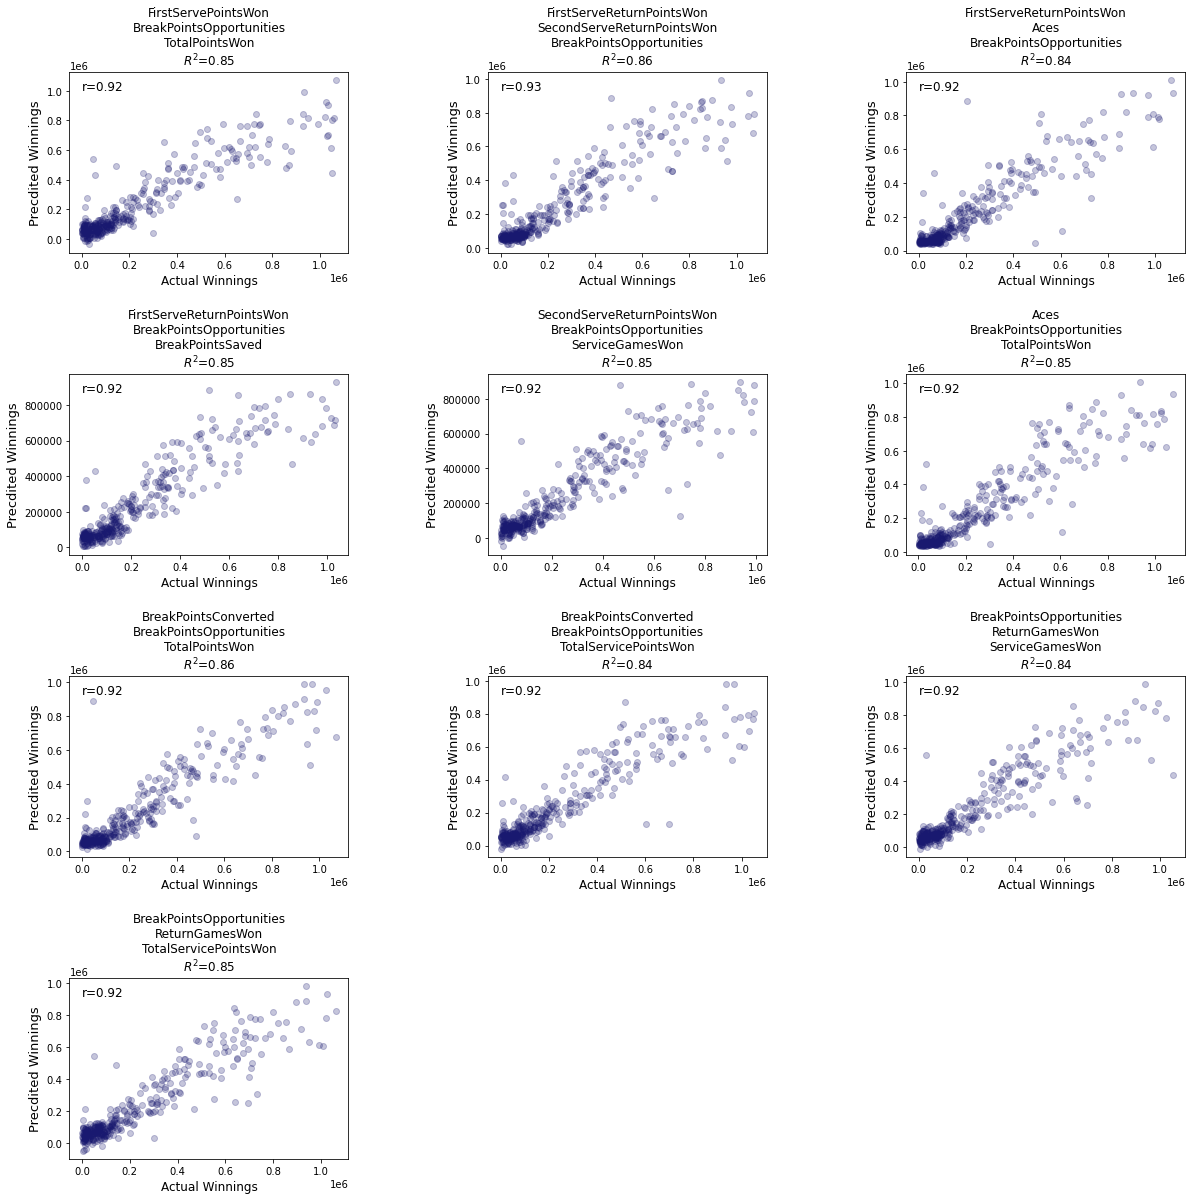

,Features,Score,coeff_r
0,BreakPointsConverted_BreakPointsOpportunities_...,0.855566,0.924990
1,FirstServeReturnPointsWon_SecondServeReturnPoi...,0.855180,0.925048
2,BreakPointsOpportunities_ReturnGamesWon_TotalS...,0.853444,0.924441
3,FirstServeReturnPointsWon_BreakPointsOpportuni...,0.850630,0.922930
4,Aces_BreakPointsOpportunities_TotalPointsWon,0.850310,0.922481
5,FirstServePointsWon_BreakPointsOpportunities_T...,0.849502,0.923742
6,SecondServeReturnPointsWon_BreakPointsOpportun...,0.846343,0.920045
7,BreakPointsConverted_BreakPointsOpportunities_...,0.844861,0.919752
8,FirstServeReturnPointsWon_Aces_BreakPointsOppo...,0.841514,0.917399
9,BreakPointsOpportunities_ReturnGamesWon_Servic...,0.840384,0.916897


In [82]:
# sets relevant coefficient of determination value
relevant_score = 0.84
#------- Two features linear regression models
p_df_3 = multi_features_reg(positive_features_names , 3, relevant_score, 'positive_three_f')

p_df_3

From the model results, we can say, with moderate certainty, that the above three features combinations are the best three features combinations a player need to have in significant amount, 'to be one of the best tennis players in the world'.<br>
<br>
Note:<br>
Depending at what value the ```relevant_score``` was set to, the computation of all the positive three features linear regression model may results with all the models having scores under the ```relevant_score```, and the models plot grid not displayed.

From the above results, we can say, with certainty, that the supervised machine learning models using two features, with a coefficient of determination values equal or superior to 0.84, are accurate at predicting winnings.

##### <font color=MediumBlue>Four Features Linear regression

We want to predict winnings using four features combination.

For our dependent variables we will use: 
- The ```Winnings``` outcome: number of matches won in a year.

For our independent variables we will use:<br>

- Positive three features combinations using:
    - ```Aces```: number of serves by the player where the receiver does not touch the ball
    - ```BreakPointsOpportunities```: number of times where the player could have won the service game of the opponent
    - ```FirstServePointsWon```: % of first-serve attempt points won by the player
    - ```SecondServePointsWon```: % of second-serve attempt points won by the player
    - ```BreakPointsSaved```: % of the time the player was able to stop the receiver from winning service game when they had the chance
    - ```ServiceGamesWon```: total number of games where the player served and won
    - ```TotalServicePointsWon```: % of points in games where the player served that they won
    - ```FirstServeReturnPointsWon```: % of opponents first-serve points the player was able to win
    - ```SecondServeReturnPointsWon```: % of opponents second-serve points the player was able to win
    - ```BreakPointsConverted```: % of the time the player was able to win their opponent’s service game when they had the chance
    - ```ReturnGamesWon```: total number of games where the player’s opponent served and the player won
    - ```ReturnPointsWon```: total number of points where the player’s opponent served and the player won
    - ```TotalPointsWon```: % of points won by the player
<br><br>
- The negative category has only two features, no negative four features combination is possible.

Linear regression models computing and plotting predicted winnings vs actual winnings of the most relevant positive four features combinations.<br>
```relevant_score``` set to 0.86

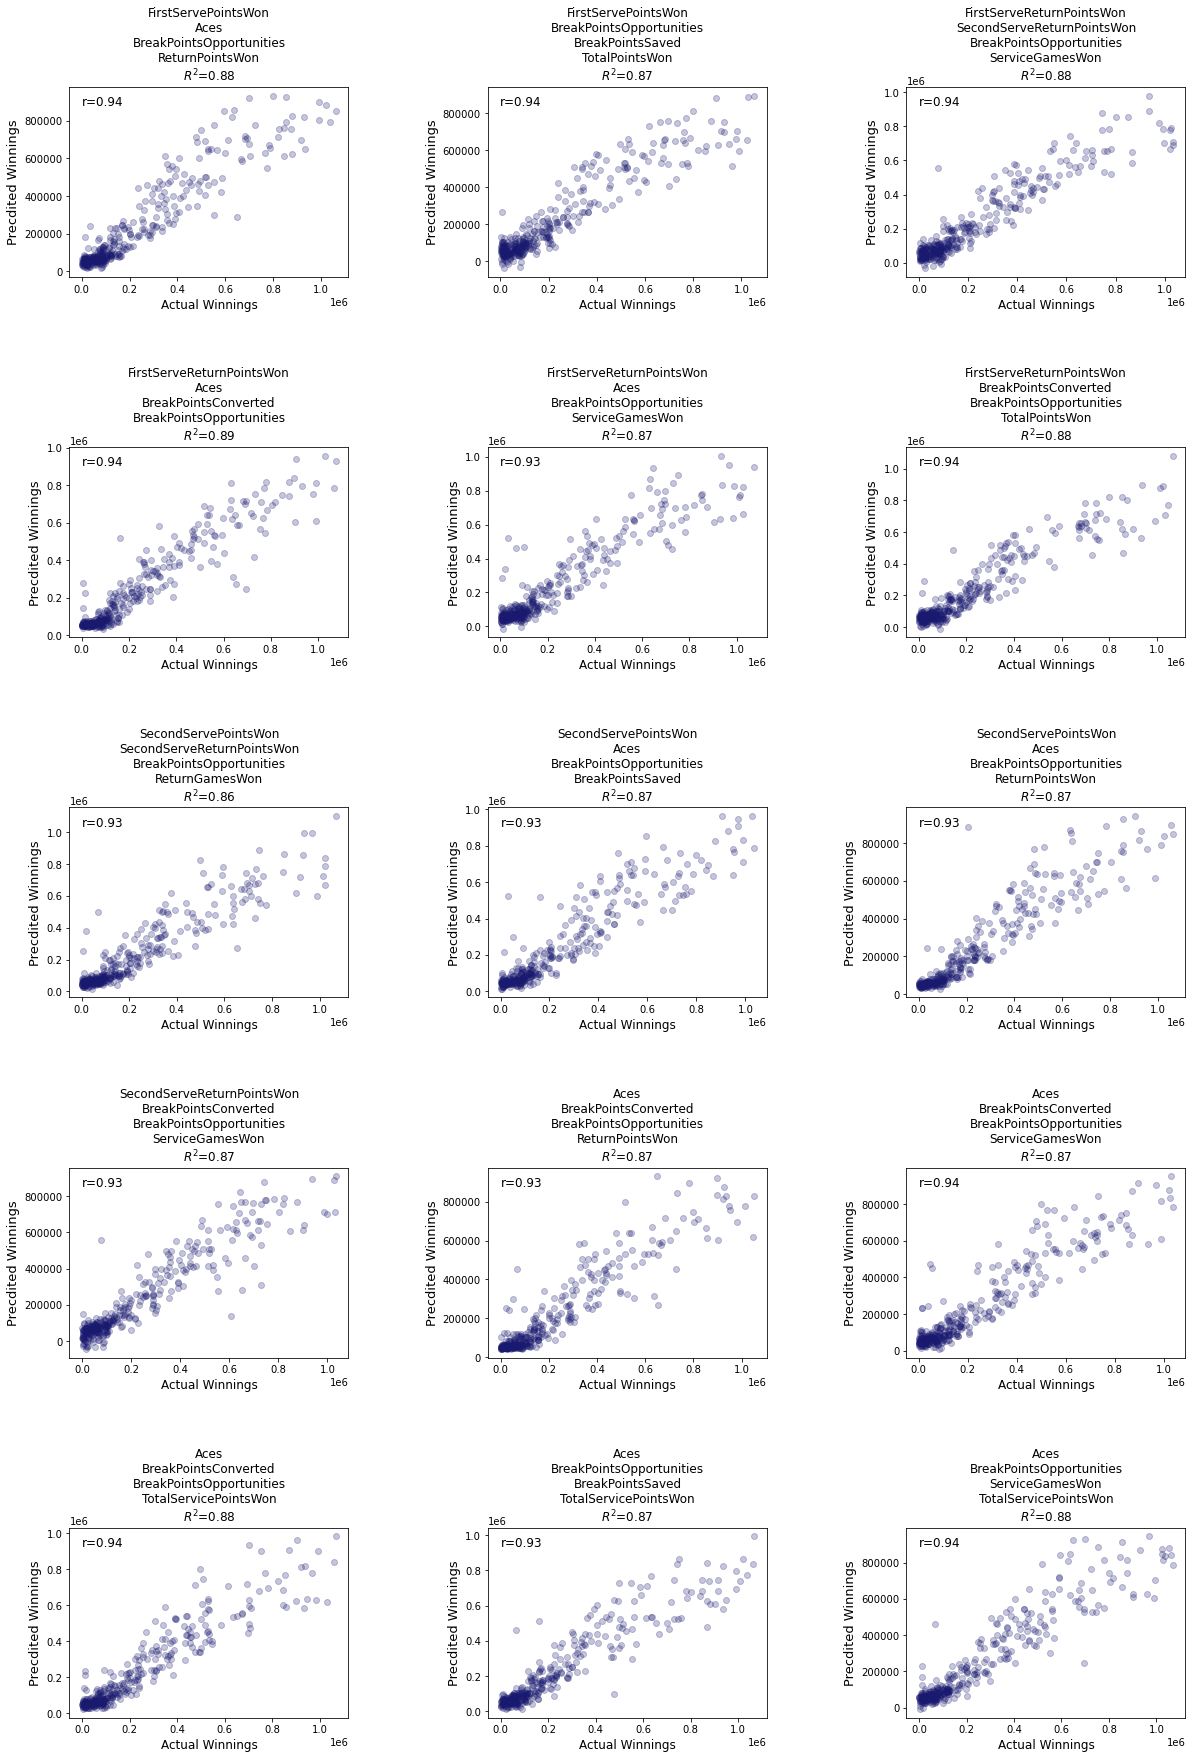

,Features,Score,coeff_r
0,FirstServeReturnPointsWon_Aces_BreakPointsConv...,0.887174,0.942850
1,FirstServeReturnPointsWon_SecondServeReturnPoi...,0.884892,0.941711
2,FirstServePointsWon_Aces_BreakPointsOpportunit...,0.881067,0.939270
3,FirstServeReturnPointsWon_BreakPointsConverted...,0.880371,0.939910
4,Aces_BreakPointsConverted_BreakPointsOpportuni...,0.878750,0.938899
5,Aces_BreakPointsOpportunities_ServiceGamesWon_...,0.877529,0.937529
6,Aces_BreakPointsConverted_BreakPointsOpportuni...,0.874851,0.935904
7,SecondServeReturnPointsWon_BreakPointsConverte...,0.871018,0.933553
8,SecondServePointsWon_Aces_BreakPointsOpportuni...,0.870087,0.932865
9,FirstServeReturnPointsWon_Aces_BreakPointsOppo...,0.869458,0.932705


In [83]:
# sets relevant coefficient of determination value
relevant_score = 0.86
#------- Two features linear regression models
p_df_4 = multi_features_reg(positive_features_names , 4, relevant_score, 'positive_four_f')

p_df_4

From the model results, we can say, with certainty, that the above four features combinations are the best four features combinations a player need to have in significant amount, 'to be one of the best tennis players in the world'.<br>
<br>
Note:<br>
Depending at what value the ```relevant_score``` was set to, the computation of all the positive four features linear regression models may result with all the models having scores under the ```relevant_score```, and the models plot grid not displayed.

From the above results, we can say, with good certainty, that the supervised machine learning models using four features, with a coefficient of determination values equal or superior to 0.86, are accurate at predicting winnings.

##### <font color=MediumBlue>All Positive Features Linear Regression

We want to predict winnings using all the positive features as one combination.

For our dependent variables we will use: 
- The ```Winnings``` outcome: number of matches won in a year.

For our independent variables we will use:<br>

- Positive all the positive features as one combination using:
    - ```Aces```: number of serves by the player where the receiver does not touch the ball
    - ```BreakPointsOpportunities```: number of times where the player could have won the service game of the opponent
    - ```FirstServePointsWon```: % of first-serve attempt points won by the player
    - ```SecondServePointsWon```: % of second-serve attempt points won by the player
    - ```BreakPointsSaved```: % of the time the player was able to stop the receiver from winning service game when they had the chance
    - ```ServiceGamesWon```: total number of games where the player served and won
    - ```TotalServicePointsWon```: % of points in games where the player served that they won
    - ```FirstServeReturnPointsWon```: % of opponents first-serve points the player was able to win
    - ```SecondServeReturnPointsWon```: % of opponents second-serve points the player was able to win
    - ```BreakPointsConverted```: % of the time the player was able to win their opponent’s service game when they had the chance
    - ```ReturnGamesWon```: total number of games where the player’s opponent served and the player won
    - ```ReturnPointsWon```: total number of points where the player’s opponent served and the player won
    - ```TotalPointsWon```: % of points won by the player

Linear regression models computing and plotting predicted winnings vs actual winnings of all the positive features combination.<br>
```relevant_score``` set to 0.70

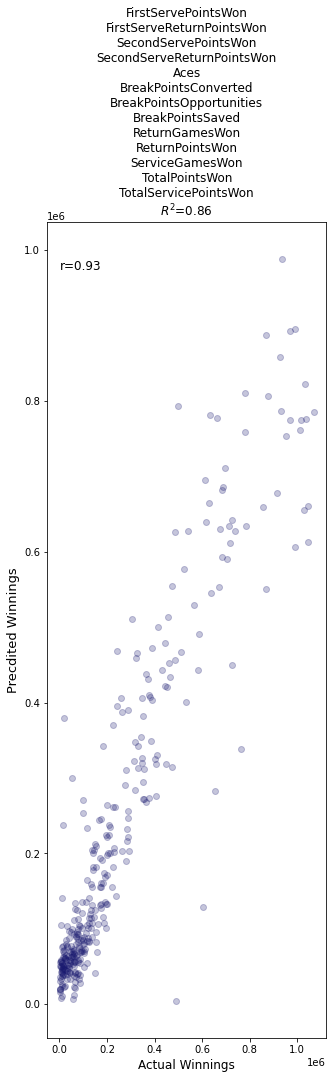

,Features,Score,coeff_r
0,FirstServePointsWon_FirstServeReturnPointsWon_...,0.856256,0.929793


In [86]:
# sets relevant coefficient of determination value
relevant_score = 0.77
#------- Two features linear regression models
all_p_df = multi_features_reg(positive_features_names , len(positive_features_names), relevant_score, 'all_positive_f')

all_p_df

From the model results, we can say, with moderate certainty, that the above all positive features combination, a player need to have in significant amount, 'to be one of the best tennis players in the world'.<br>
Note:<br>
Depending at what value, the ```relevant_score``` was set to, the computation of all the positive features linear regression model may result with the model having scores under the ```relevant_score```, and the model plot not displayed.